# **Joins In Pandas**

In pandas, "joins" refer to the process of combining data from two or more DataFrames based on a common column or index. There are several types of joins available, which determine how rows are matched between DataFrames. Let's go into more detail about the different types of joins and how to perform them in pandas:

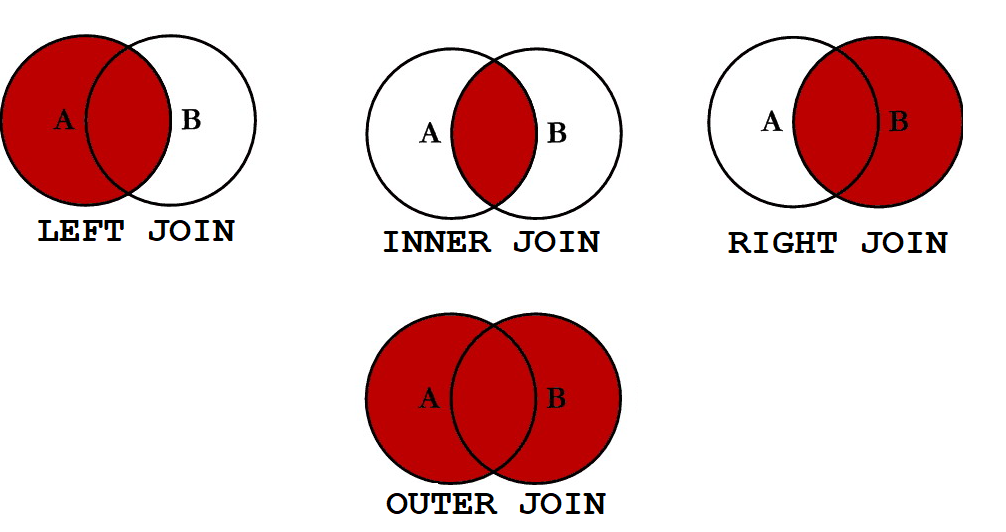

1. **Inner Join**:
   - An inner join returns only the rows that have matching keys in both DataFrames.
   - Use the `pd.merge()` function with the `how='inner'` parameter or use the `.merge()` method with the same parameter to perform an inner join.
   - Example:

   ```python
   merged_df = pd.merge(left_df, right_df, on='key', how='inner')
   ```

2. **Left Join (Left Outer Join)**:
   - A left join returns all the rows from the left DataFrame and the matching rows from the right DataFrame. Non-matching rows from the left DataFrame will also be included.
   - Use the `how='left'` parameter with `pd.merge()` or `.merge()` to perform a left join.
   - Example:

   ```python
   merged_df = pd.merge(left_df, right_df, on='key', how='left')
   ```

3. **Right Join (Right Outer Join)**:
   - A right join is the opposite of a left join. It returns all the rows from the right DataFrame and the matching rows from the left DataFrame. Non-matching rows from the right DataFrame will also be included.
   - Use the `how='right'` parameter with `pd.merge()` or `.merge()` to perform a right join.
   - Example:

   ```python
   merged_df = pd.merge(left_df, right_df, on='key', how='right')
   ```

4. **Full Outer Join**:
   - A full outer join returns all rows from both DataFrames, including both matching and non-matching rows.
   - Use the `how='outer'` parameter with `pd.merge()` or `.merge()` to perform a full outer join.
   - Example:

   ```python
   merged_df = pd.merge(left_df, right_df, on='key', how='outer')
   ```

5. **Join on Multiple Columns**:
   - You can perform joins on multiple columns by passing a list of column names to the `on` parameter.
   - Example:

   ```python
   merged_df = pd.merge(left_df, right_df, on=['key1', 'key2'], how='inner')
   ```

6. **Join on Index**:
   - You can join DataFrames based on their indices using the `left_index` and `right_index` parameters set to `True`.
   - Example:

   ```python
   merged_df = pd.merge(left_df, right_df, left_index=True, right_index=True, how='inner')
   ```

7. **Suffixes**:
   - If DataFrames have columns with the same name, you can specify suffixes to differentiate them in the merged DataFrame using the `suffixes` parameter.
   - Example:

   ```python
   merged_df = pd.merge(left_df, right_df, on='key', how='inner', suffixes=('_left', '_right'))
   ```

Joins in pandas are a powerful way to combine and analyze data from multiple sources. It's important to understand the structure of your data and the requirements of your analysis to choose the appropriate type of join. You can also use the `.join()` method if you want to join DataFrames based on their indices or use `pd.concat()` to stack DataFrames without performing a join based on columns or indices.

In [1]:
import pandas as pd
import numpy as np

## **Practical on Joins In Pandas**


In [7]:
# import some Dataset
courses = pd.read_csv('Data\Day37\courses.csv')


dec = pd.read_csv('Data\Day37\Dec.csv')
matches = pd.read_csv('Data\Day37\matches.csv')
delivery = pd.read_csv('Data\Day37\deliveries.csv')

In [9]:
students = pd.read_csv('Data\Day37\student.csv')

In [11]:
nov = pd.read_csv('Nov.csv')

## Concat

In [12]:
pd.concat([nov,dec],axis=1)

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


In [15]:
regs = pd.concat([nov,dec],ignore_index=True)
regs.head(2)

,student_id,course_id
0,23,1
1,15,5


## Inner join

In [17]:
inner = students.merge(regs,how='inner',on='student_id')
inner.head()

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5


## left join

In [18]:
left = courses.merge(regs,how='left',on='course_id')
left.head()

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0


## right join

In [19]:
temp_df = pd.DataFrame({
    'student_id':[26,27,28],
    'name':['Nitish','Ankit','Rahul'],
    'partner':[28,26,17]
})

students = pd.concat([students,temp_df],ignore_index=True)

In [20]:
students.head()

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6


## outer join

In [21]:
students.merge(regs,how='outer',on='student_id').tail(10)

,student_id,name,partner,course_id
53,23,Chhavi Lachman,18.0,5.0
54,24,Radhika Suri,17.0,4.0
55,25,Shashank D’Alia,2.0,1.0
56,25,Shashank D’Alia,2.0,10.0
57,26,Nitish,28.0,NaN
58,27,Ankit,26.0,NaN
59,28,Rahul,17.0,NaN
60,42,NaN,NaN,9.0
61,50,NaN,NaN,8.0
62,38,NaN,NaN,1.0
